# How Confident are you in your Test Results?


Imagine that you need to estimate the average of an unknown quantity. For instance, the average height of the employees of your company. The company employs a lot of people, so it is simply unfeasible to go and measure each one of them to get the exact value of the mean. Besides, the deadline for delivering your results is fast approaching. 

What can you do? One option is to select a random subset of colleagues, take their measurements, and use that as an estimate of the real average height. This is ok, probably the best you can do anyway, but can you really trust the result? Was the subset large enough? What is the level of confidence that the number that you computed is close enough to the real result? In short, providing a single number as the result of the experiment is not sufficient, it is important to provide a Confidence Interval as well.

In this post we will talk about:
* How to verify whether a random variable follows a Normal distribution or not
* The Central Limit Theorem (CLT), and why averages tend to be Normal
* How to compute the Confidence Interval of your result, and its dependence on the subset size

### "Normality" of a Distribution

It is tempting to assume that the random variables your are working with are Normally distributed. Wouldn't that be nice? Normal distributions are easy to deal with, and they are fully described by the two parameters $\mu$ and $\sigma$, their mean and standard deviation. Unfortunately, real life is full of examples of random variables whose distribution is far from Normal. How can you verify the Normality of a distribution of some random samples?

The Python script below generates 10,000 samples accordingly to three different probability distributions (Uniform, Triangular, and Normal). The random samples values are roughly between 0 and 100 (I say roughly because you can't technically limit the range of values for a Normal distribution). For each distribution, the data is analyzed using Python's `normaltest` function, and then graphed using histogram and Q-Q plots.

- **Python's `normaltest` function** returns the 2-sided chi squared probability to test the null hypothesis that a sample comes from a Normal distribution. If the probability is smaller than 5%, it is possible to assume that the samples are not Normally distributed. The results are printed right below the code block and they confirm that only the third distribution qualifies as Normal.

- **Histogram plots** divide the range of sample values is equally-sized bins, and then counts the number of samples in each bin. Only the third histogram is shaped like the classic "bell curve" typical of Normal distributions.

- Finally, **Q-Q plots** plot the quantiles of the samples vs the quantiles of the Normal distribution. If the samples come from a Normal distribution their quantiles will perfectly line up over the red 45 degree straight line passing from the origin. As clear in the plots below, only the samples from the third set pass this test.

Before moving forward, it is worth nothing these three techniques are not the only options available to verify the Normality of a distribution. Furthermore, none of them is perfect, and as such it is recommended to always use two (or more) different ways to test your data.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from util_functions import *

# Matplotlib Settings
distr_color = 'crimson'
qqplot_color = 'blue'
mpl.rcParams['axes.grid']=True
mpl.rcParams['axes.axisbelow']=True
mpl.rcParams['grid.alpha']=0.5

# HYPERPARAMS
pts_nr =  1000      # Nr of points to create distributions
avgs_nr = 1000      # Nr of means to create the distribution of means
bins_nr = 50        # Nr of bins to use in histograms
distr_seq = ['uniform', 'triangular', 'normal']

Distribution #1 is not Normal
Distribution #2 is not Normal
Distribution #3 is Normal


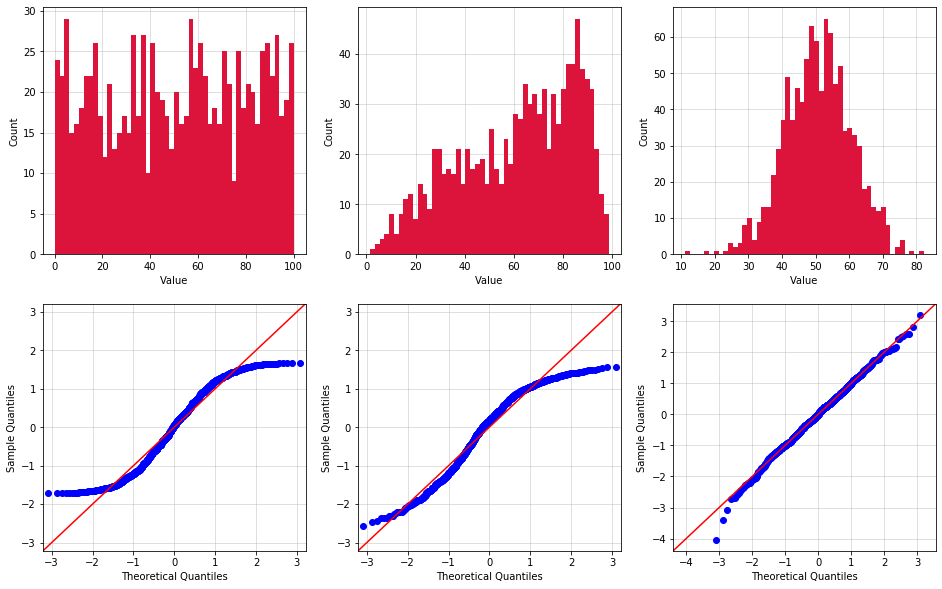

In [2]:
fig, ax = plt.subplots(2,3, figsize=(16,10))

for i, distr in enumerate(distr_seq):
    data = random_data(distr, pts_nr)
    ax[0,i].hist(data, bins=bins_nr, color=distr_color);
    ax[0,i].set_xlabel("Value")
    ax[0,i].set_ylabel("Count")
    qqplot(np.array(data), fit=True, line='45', ax=ax[1,i], color=qqplot_color);
    
    if normaltest(data)[-1] > 0.05:
        print("Distribution #{} is Normal".format(i+1))
    else:
        print("Distribution #{} is not Normal".format(i+1))

### Central Limit Theorem

Let's formalize our problem in a more mathematical way: we want to find a good estimate of the average $\mu$ of a population of $N$ samples, by measuring the average $S_n$ of a smaller random subset $n \ll N$. It is easy to see that different random subsets will yield a different average, hence $S_{n}$ is also a random variable.

The [Central Limit Theorem (CTL)](https://en.wikipedia.org/wiki/Central_limit_theorem) states that, no matter what is the Probability Distribution Function (PDF) of the population $N$, the PDF of $S_{n}$ is Normal, as long as $n$ is "large enough". While $n>30$ is often used as the condition to guarantee Normality, the minimum value of $n$ highly depends on the PDF of the population, as we will see later.

Let's assume $n$ is large enough, hence $S_{n}$ is Normally distributed. In this case, its standard deviation is:

$$\sigma = \frac{s}{\sqrt{n}} \tag{Eq. 1}$$

where $s$ is the standard deviation of the subset $n$. Note that $\sigma$ decreases for larger $n$, which means that, as intuition suggests, $S_{n}$ becomes a better estimate of $\mu$, the larger is the subset used to compute it.

### Confidence Interval (CI)

Because $S_{n}$ is a random variable, it needs to be accompanied by $\sigma$ to carry any practical meaning. A better way to indicate the "confidence" in $S_{n}$ is to calculate its Confidence Interval (CI). The confidence interval of $S_{n}$ is a range of values defined such that there is a specified probability that $\mu$ lies within it.

For example a 95% confidence interval is a range of values around $S_{n}$, such that there is a 95% probability that it includes $\mu$. It means that, if you compute 100 confidence intervals using 100 different random subsets $n$, $\mu$ will be within the intervals 95 times. Not surprisingly, CI and $\sigma$ are strongly related. If $S_{n}$ is Normally distributed:

$$ CI = S_{n} \pm z\sigma = S_{n} \pm z\frac{s}{\sqrt{n}} \tag{Eq. 2}$$

where $z$ is a scaling factor that depends on the desired level of confidence. $z=1.96$ for 95% confidence intervals. $1.96$ is the approximate value of the 97.5 percentile point of the normal distribution, which means that $S_{n}\pm1.96\sigma$ includes 95% of the area and the samples of the distribution. The values of $z$ for different level of confidence can be found online.

For any value of $n$ lower than $20\sim30$, the Normal distribution needs to be replaced with [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution), which is also symmetric and bell-shaped, but has heavier tails, which makes it more suitable to estimate the confidence interval of the mean of a normally distributed population in situations where the sample size is small and the population standard deviation is unknown. The equation below for the confidence interval is identical the one presented for the Normal case, save for replacing $z$ with $t$ ($t \geq z$). Tables with the value of $t$ for different values of $n$ and desired confidence level can be found online as well.

$$ CI = S_{n} \pm t\sigma = S_{n} \pm t\frac{s}{\sqrt{n}} \tag{Eq. 3}$$

### Simulation Results

The Python code below generates three not Normally distributed population of samples. 10,000 $S_{n}$ have been computed for each distribution, using random subsets with a different number of samples $n$ (from $S_{2}$ up to $S_{10,000}$). The results for the Exponential, Triangular and Uniform distributions are reported in the graphs on row 1, 2, and 3, respectively.

- The histogram of $S_{n}$ looks like the characteristic bell shape of a Normal distribution only for $n\geq30$. When $n<30$, the distributions resemble the population's distribution (this is particularly evident for row 1 and 2). Also note how the width of the distribution of $S_n$ decreases as the number of samples increases. This is intuitive: the more samples we use for our test, the more accurate will be our estimate of the exact result.
- Likewise, the Q-Q Plots tend to the ideal 45-degree straight line only for $n\geq30$.
- The plots in the third column indicate the probability that $\mu$ is contained by the 95% confidence interval (I called it _CI score_, for lack of better words). The red points are calculated using $\text{(Eq. 2)}$, the blue ones use $\text{(Eq. 3)}$. Ideally all points should be equal to 0.95 (dashed black line), indicating that the probability is indeed 95%. As clearly indicated by the chart, the t-distribution provides much better results for small $n$ ($n<30$).

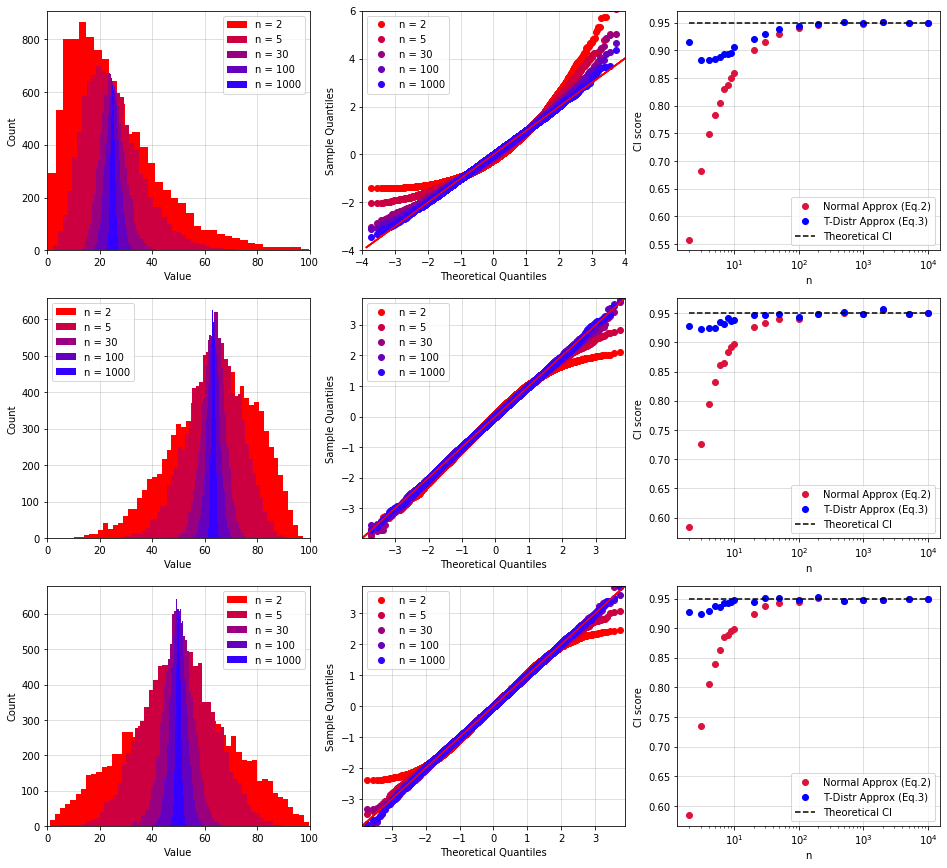

In [3]:
distributions = ['exponential','triangular','uniform']
samples_list = [2,3,4,5,6,7,8,9,10,20,30,50,100,200,500,1000,2000,5000,10000]
samples_to_plot = [2,5,30,100,1000]

results = CI_vs_samples(distributions, samples_list, samples_to_plot)

The table below summarizes the results for the uniform distribution:
- **n** indicates the size of each subset. 10,000 subsets were generated to obtain 10,000 $S_{n}$ for each $n$, so that the properties of the distribution of $S_n$ could be studied.
- **Normal** indicates whether the distribution of $S_{n}$ is Normal using the `normaltest` function. The distributions pass the test only for $n \geq 30$.
- **Exp. Sigma** and **Sigma** indicate the expected standard deviation computed using $\text{(Eq. 1)}$, and the measured value. The two values are quite different for small $n$, but they become very similar when $n>100$.
- **CI_norm** and **CI_t** report the 95% confidence interval computed using a Normal and t-distribution approximations. To be more precise, $CI_{norm} = 2z\sigma$, while $CI_{t} = 2t\sigma$.
- **CI_norm_score** and **CI_t_score** measure the probability that the CI contains $\mu$. This data was represented above by the graphs in the third column.

In [4]:
display(results[2])

,n,Normal,Exp. Sigma,Sigma,CI_norm,CI_norm_score,CI_t,CI_t_score
0,2,False,9.036376,20.405008,4.508980,0.5845,41.338343,0.9271
1,3,False,22.139243,16.613397,67.533547,0.7355,181.570551,0.9237
2,4,False,7.557545,14.465059,30.558375,0.8065,57.293406,0.9285
3,5,False,9.422063,12.945595,19.077732,0.8392,30.214456,0.9374
4,6,False,10.735524,11.950350,56.134240,0.8628,80.648043,0.9359
5,7,False,10.975302,10.779155,33.696905,0.8853,45.438675,0.9434
6,8,False,11.365839,10.204828,31.578842,0.8892,40.728483,0.9434
7,9,False,8.894123,9.632121,41.924796,0.8957,52.318012,0.9449
8,10,False,9.587357,9.179804,30.711119,0.8993,37.362944,0.9480
9,20,False,7.055528,6.471786,22.821121,0.9246,25.003069,0.9451


### Conclusions

The average $S_n$ of a subset $n$ can be used as an approximation of the real average $\mu$ of a population $N \gg n$ only when accompanied by a Confidence Interval (CI). The equations provided in this post to computer CI assume that $S_n$ is Normal. 

The [Central Limit Theorem (CTL)](https://en.wikipedia.org/wiki/Central_limit_theorem) states that, no matter what is the Probability Distribution Function (PDF) of the population $N$, the PDF of $S_{n}$ is Normal, as long as $n$ is "large enough" (a minimum value of 30 is recommended).

If the distribution of $S_{n}$ is Normal, its confidence interval can be computed using $\text{(Eq. 2)}$. Student's t-distribution must be used to approximate the PDF of $S_n$ if $n<30$, and $\text{(Eq. 3)}$ should be used to compute the confidence interval.